In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
data = tf.keras.datasets.mnist # Hand Written Digits Data
(x_train,y_train) , (x_test,y_test) = data.load_data()
x_train.shape

(60000, 28, 28)

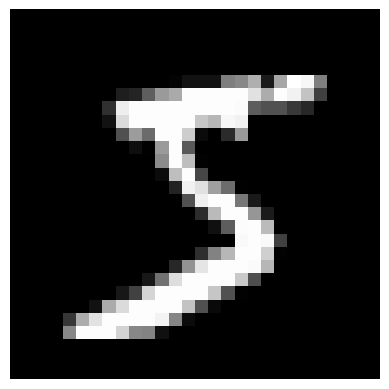

5


In [25]:
image = x_train[0]  # İlk görüntüyü seçme (0-59999 arası indeks kullanabilirsiniz)

# Görüntüyü gösterme
plt.imshow(image, cmap='gray')  # 'gray' siyah-beyaz görüntü için
plt.axis('off')  # Eksenleri gizleme
plt.show()
print(y_train[0])